In [1]:
library(monocle3)

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with


In [2]:
gex <- read.csv('/home/ngr4/scratch60/scnd/data/processed/astrocytes_raw_cellxgene.csv', header=FALSE) # cell x gene
cell_metadata <- read.csv('/home/ngr4/scratch60/scnd/data/processed/astrocytes_cellmd.csv')
gene_metadata <- read.csv('/home/ngr4/scratch60/scnd/data/processed/astrocytes_genemd.csv')

# match row names
gex <- t(gex)
rownames(gex) <- rownames(gene_metadata)
colnames(gex) <- rownames(cell_metadata)

# add gene_short_name
gene_metadata$gene_short_name <- rownames(gene_metadata)

In [3]:
# monocle cell_data_set obj
cds <- new_cell_data_set(gex,
                         cell_metadata = cell_metadata,
                         gene_metadata = gene_metadata)

In [4]:
# pre-process data
cds <- preprocess_cds(cds, num_dim=20)

# option 1: w/ or w/o monocle batch removal 

In [5]:
# reduce dimensionality
cds <- reduce_dimension(cds)


No preprocess_method specified, using preprocess_method = 'PCA'



In [6]:
# cluster cells
cds <- cluster_cells(cds, reduction_method = "UMAP")


No trajectory to plot. Has learn_graph() been called yet?



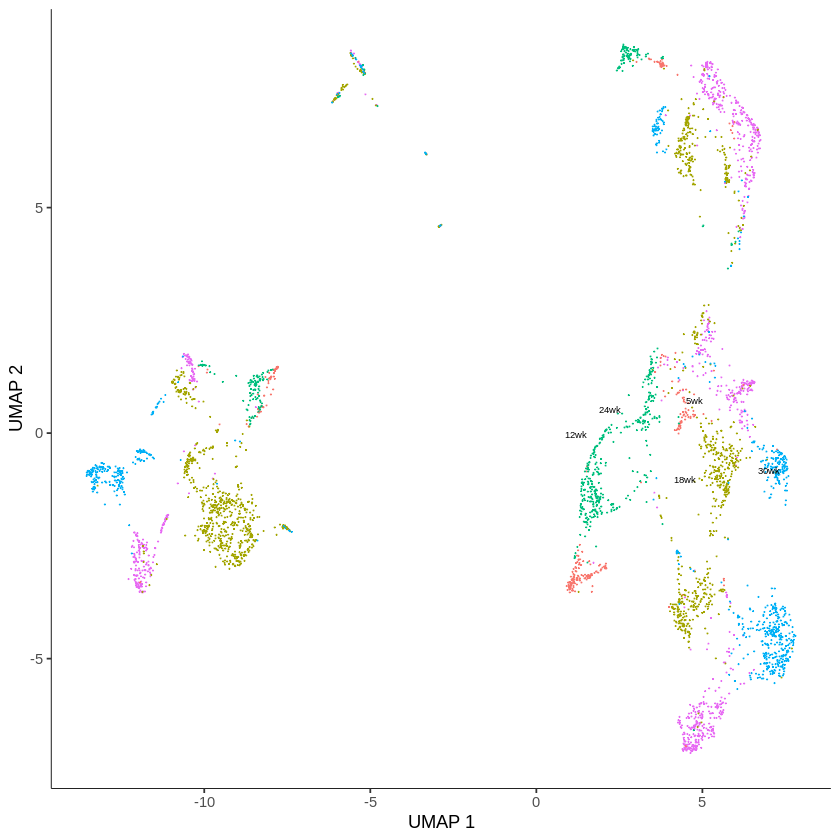

In [7]:
# visualize
plot_cells(cds, label_groups_by_cluster=FALSE, color_cells_by = "timepoint")


In [101]:
?learn_graph

learn_graph {monocle3},R Documentation
cds,the cell_data_set upon which to perform this operation
use_partition,"logical parameter that determines whether to use partitions calculated during cluster_cells and therefore to learn disjoint graph in each partition. When use_partition = FALSE, a single graph is learned across all partitions. Default is TRUE."
close_loop,logical parameter that determines whether or not to perform an additional run of loop closing after estimating the principal graphs to identify potential loop structure in the data space. Default is TRUE.
learn_graph_control,NULL or a list of control parameters to be passed to the reversed graph embedding function. Default is NULL. A list of potential control parameters is provided in details.
verbose,Whether to emit verbose output during graph learning.


In [8]:
# learn graph 
cds <- learn_graph(cds,   use_partition = FALSE)


  |======================================================================| 100%


In [106]:
savefigs = TRUE

Warning message:
"ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


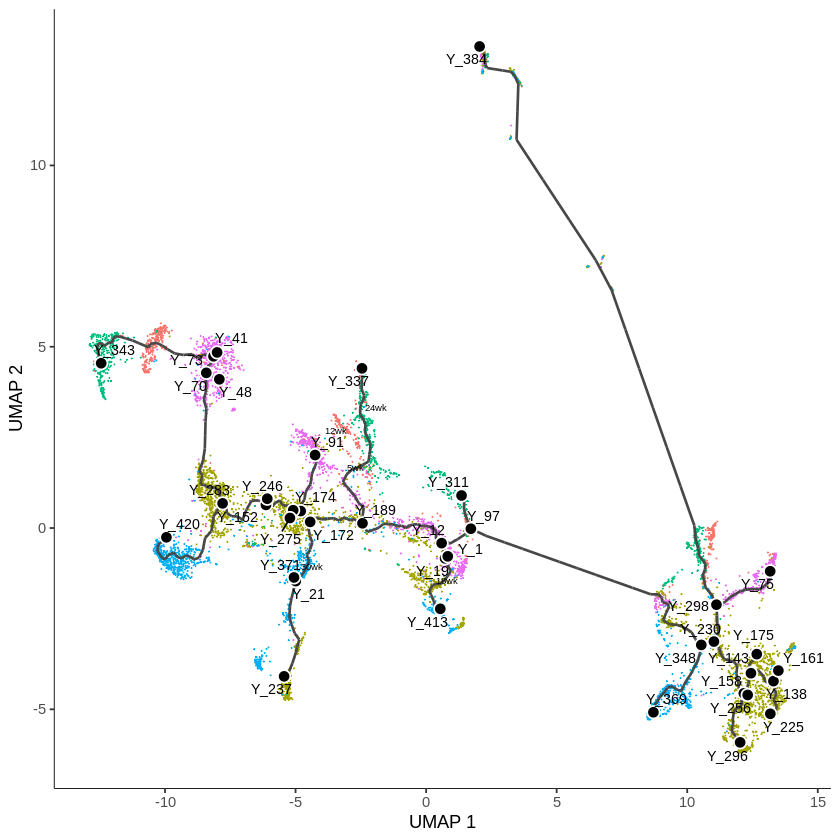

In [108]:
# visualize principal graph
p <- plot_cells(cds,
           color_cells_by = "timepoint",
           label_groups_by_cluster=FALSE,
                label_principal_points =TRUE, 
           label_leaves=FALSE,
           label_branch_points=FALSE)
p

if(savefigs){
    
    pdf("/home/ngr4/scratch60/scnd/results/monocle3_principlegraph.pdf")
    print(p) 
    dev.off()
    savefigs = FALSE
}
    


In [109]:
# options: order cellls by principle points OR cells
cds <- order_cells(cds, root_pr_nodes='Y_41')

In [91]:
savefigs = TRUE

Cells aren't colored in a way that allows them to be grouped.



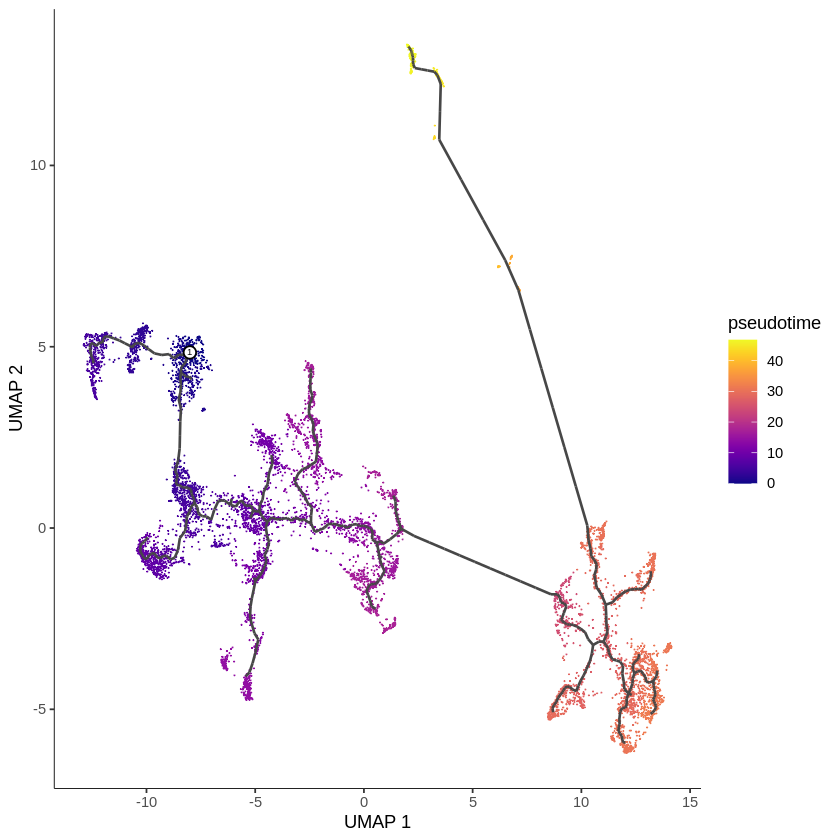

In [110]:
# visualize principal graph
p <- plot_cells(cds,
           color_cells_by = "pseudotime",
           label_groups_by_cluster=FALSE,
           label_principal_points =FALSE, 
           label_leaves=FALSE,
           label_branch_points=FALSE)
p

if(savefigs){
    
    pdf("/home/ngr4/scratch60/scnd/results/monocle3_pseudot.pdf")
    print(p) 
    dev.off()
    savefigs = FALSE
}

In [9]:
# try following:
## The function below does so by first grouping the cells according to which trajectory graph node they are nearest to. Then, it calculates what fraction of the cells at each node come from the earliest time point. Then it picks the node that is most heavily occupied by early cells and returns that as the root.
# a helper function to identify the root principal points:
get_earliest_principal_node <- function(cds, time_bin="5wk"){
  cell_ids <- which(colData(cds)[, "timepoint"] == time_bin)
  
  closest_vertex <-
  cds@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
  closest_vertex <- as.matrix(closest_vertex[colnames(cds), ])
  root_pr_nodes <-
  igraph::V(principal_graph(cds)[["UMAP"]])$name[as.numeric(names
  (which.max(table(closest_vertex[cell_ids,]))))]
  
}

cds <- order_cells(cds, root_pr_nodes=get_earliest_principal_node(cds))

In [12]:
savefigs = TRUE

Cells aren't colored in a way that allows them to be grouped.



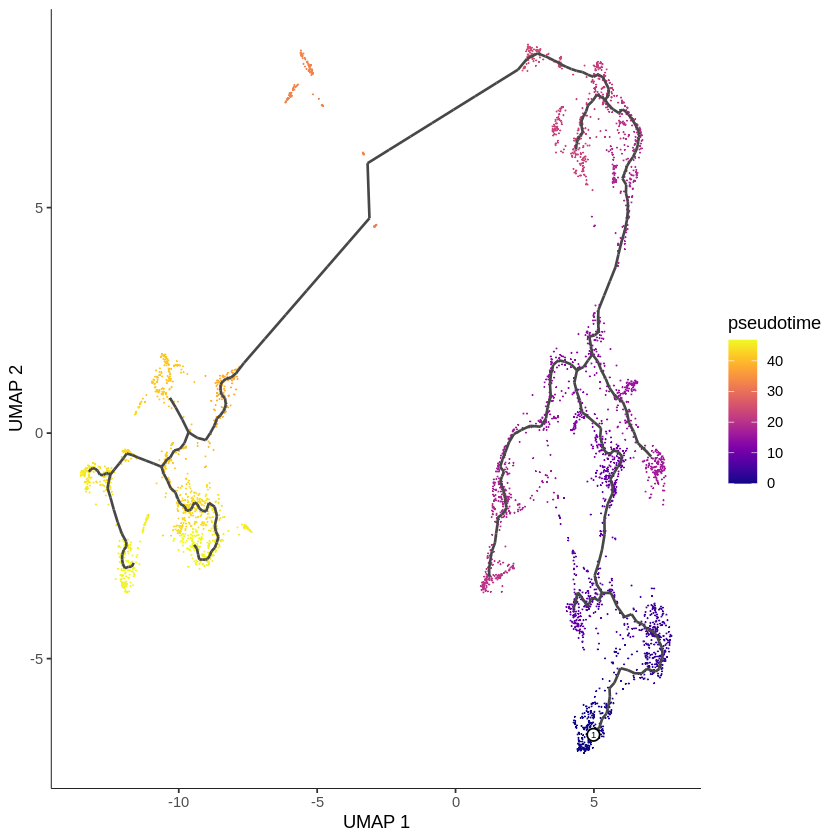

In [13]:
# visualize principal graph
p <- plot_cells(cds,
           color_cells_by = "pseudotime",
           label_groups_by_cluster=FALSE,
           label_principal_points =FALSE, 
           label_leaves=FALSE,
           label_branch_points=FALSE)
p

if(savefigs){
    
    pdf("/home/ngr4/project/scnd/results/monocle3_pseudot.pdf")
    print(p) 
    dev.off()
    savefigs = FALSE
}

In [100]:
# parition the cells into supergroups?
## REF: http://cole-trapnell-lab.github.io/monocle-release/monocle3/#step-3-partition-the-cells-into-supergroups
cds <- partitions(cds)

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   1    3    1    1    3    3    1    2    1    2    1    1    1    2    1    1 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   1    3    1    1    1    1    1    2    2    1    1    3    1    1    2    1 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   1    1    1    3    1    1    1    1    1    1    1    1    1    1    1    1 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   1    2    3    3    1    3    2    1    1    3    1    1    3    3    1    1 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
   1    1    1    1    3    1    2    1    1    1    1    2    1    1    3    1 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
   3    1    1    1    2    1    1    3    2    1    1    1    3    1    2    1 
  97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112 
   3    1    2    2    3    1    3    1    1    1    1    3    1    2    2    1 
 113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128 
   1    3    2    3    2    2    1    1    1    2    1    1    1    1    1    2 
 129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144 
   1    1    2    1    2    1    3    1    1    3    3    1    3    1    1    1 
 145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160 
   3    1    1    2    3    3    2    2    2    1    2    1    1    1    2    1 
 161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176 
   1    3    2    1    3    1    3    3    1    1    3    2    2    2    1    3 
 177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192 
   2    3    2    1    1    1    3    2    1    1    1    3    5    3    2    3 
 193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208 
   1    1    3    1    1    1    3    1    1    1    6    2    2    1    1    1 
 209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  224 
   1    2    1    3    1    1    3    1    1    2    1    1    1    1    1    1 
 225  226  227  228  229  230  231  232  233  234  235  236  237  238  239  240 
   1    1    6    1    1    1    3    1    1    1    1    1    1    1    1    2 
 241  242  243  244  245  246  247  248  249  250  251  252  253  254  255  256 
   2    3    2    1    3    3    3    1    2    1    3    3    1    1    2    1 
 257  258  259  260  261  262  263  264  265  266  267  268  269  270  271  272 
   1    3    2    1    2    3    3    2    3    1    2    1    1    1    2    3 
 273  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288 
   3    1    1    1    2    1    1    1    1    1    2    1    2    3    1    1 
 289  290  291  292  293  294  295  296  297  298  299  300  301  302  303  304 
   1    3    1    6    2    2    1    1    1    1    1    3    2    1    1    1 
 305  306  307  308  309  310  311  312  313  314  315  316  317  318  319  320 
   2    2    2    1    1    3    3    1    2    1    1    2    5    2    1    1 
 321  322  323  324  325  326  327  328  329  330  331  332  333  334  335  336 
   1    1    6    3    1    1    2    2    1    2    1    1    2    3    2    5 
 337  338  339  340  341  342  343  344  345  346  347  348  349  350  351  352 
   3    1    3    1    3    3    3    1    1    2    1    2    1    1    2    1 
 353  354  355  356  357  358  359  360  361  362  363  364  365  366  367  368 
   3    1    2    5    1    2    3    2    1    3    1    1    1    1    1    2 
 369  370  371  372  373  374  375  376  377  378  379  380  381  382  383  384 
   2    2    2    1    2    3    3    1    8    1    3    1    3    1    1    5 
 385  386  387  388  389  390  391  392  393  394  395  396  397  398  399  400 
   2    2    3    2    1    2    1

In [52]:
# monocle2scanpy
## REF: https://github.com/cole-trapnell-lab/monocle-release/issues/356
traj.coord<- cds@principal_graph_aux@listData[["UMAP"]][["pseudotime"]] # cds@principal_graph_aux$UMAP$pseudotime
umap_coords <- reducedDims(cds)[['UMAP']]


In [72]:
write.csv(cbind(as.matrix(traj.coord), as.matrix(umap_coords)), "/home/ngr4/scratch60/scnd/monocole_traj-umapcoords.csv")